# Scatterplots

Here we visualize the scatterplots of LID and likelihoods.


In [8]:
%load_ext autoreload

%autoreload 2
from utils import parse_table, read_csv
import pandas as pd
import numpy as np

from pretty import plot_kde, ColorTheme


def get_scatter(in_distr, ood, type, all_tasks): 
    global likelihood_generated, lid_generated
    global likelihood_in, lid_in
    global likelihood_ood, lid_ood
    in_vs_out = all_tasks[type][in_distr][ood]
    likelihood_generated = in_vs_out[in_vs_out['name'] == 'generated']['log-likelihood'].values
    lid_generated = in_vs_out[in_vs_out['name'] == 'generated']['LID'].values
    likelihood_in = in_vs_out[in_vs_out['name'] == 'test']['log-likelihood'].values
    lid_in = in_vs_out[in_vs_out['name'] == 'test']['LID'].values
    likelihood_ood = in_vs_out[in_vs_out['name'] == 'ood']['log-likelihood'].values
    lid_ood = in_vs_out[in_vs_out['name'] == 'ood']['LID'].values
    

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## The main paper figure



In [9]:
df = read_csv('grayscale_LID_vs_likelihood_flow_fixed_medium_scale.csv')
all_tasks_grayscale = parse_table(df)
all_tasks_grayscale['fashion-mnist']['mnist']
all_tasks = {'grayscale': all_tasks_grayscale}

3/5: 100%|██████████| 4/4 [00:03<00:00,  1.27it/s]


<Axes: xlabel='$LID_\\theta(\\mathbf{x})$', ylabel='$\\log p_\\theta(\\mathbf{x}) \\times 10^{-3}$'>

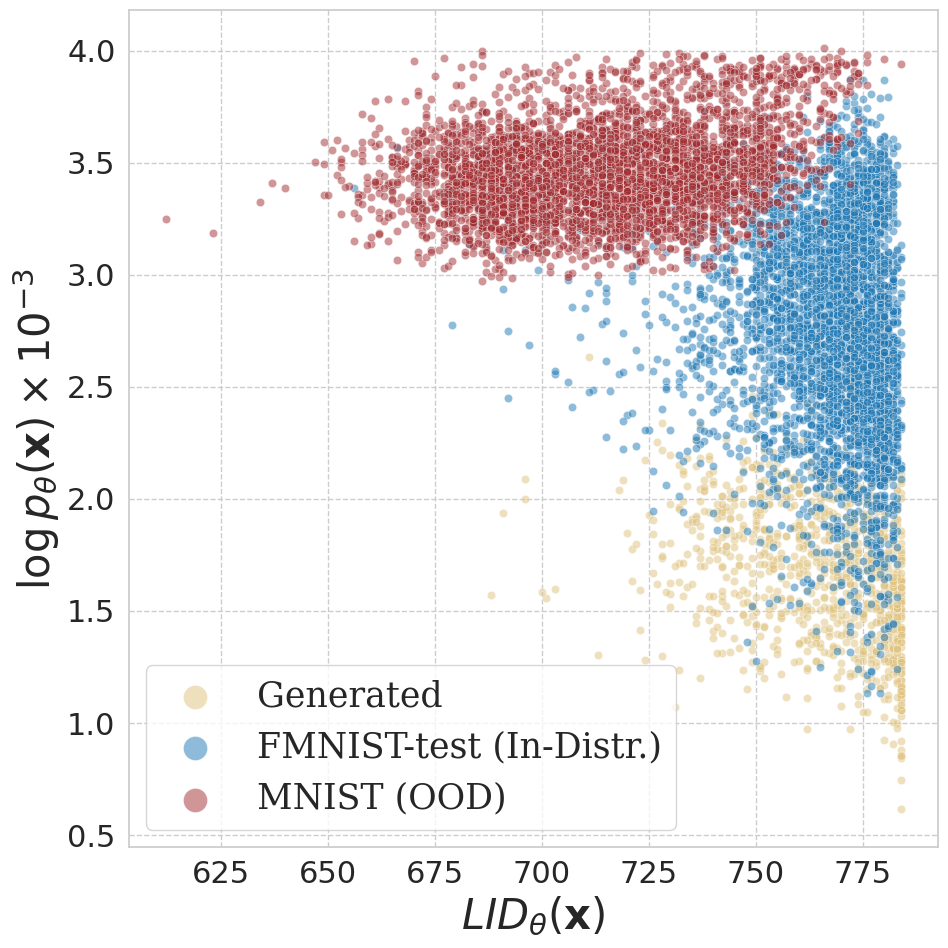

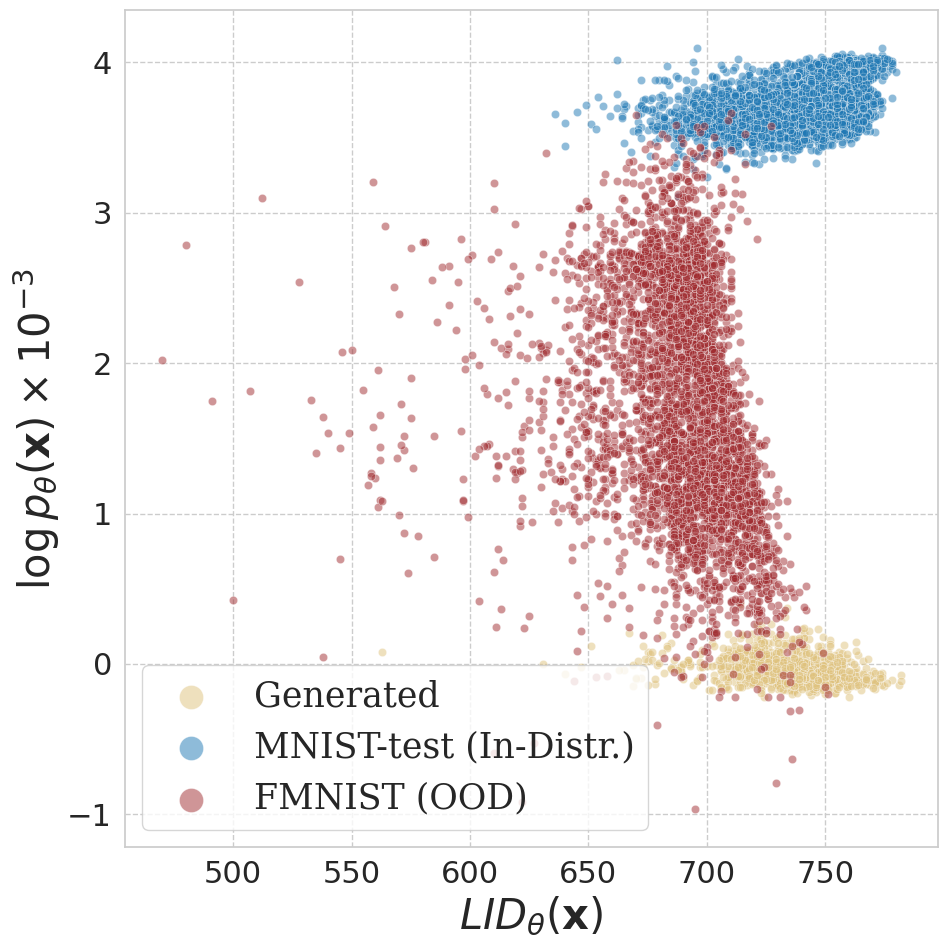

In [14]:
from pretty import plot_scatter, ColorTheme

get_scatter('fashion-mnist', 'mnist', 'grayscale', all_tasks)

plot_scatter(
    y_s = [
        likelihood_generated,
        likelihood_in,
        likelihood_ood,
    ],
    x_s = [
        lid_generated,
        lid_in,
        lid_ood,
    ],
    labels = [
        'Generated',
        'FMNIST-test (In-Distr.)',
        'MNIST (OOD)',
    ],
    colors = [
        ColorTheme.GENERATED.value,
        ColorTheme.IN_DISTR.value,
        ColorTheme.OOD.value,
    ],
    y_label='$\\log p_\\theta(\\mathbf{x})$',
    x_label='$LID_\\theta(\\mathbf{x})$',
    figsize=(10, 10),
    legend_loc='lower left',
    file_name='fmnist_vs_mnist_fixed_scatterplot',
    dotsize=300,
    legend_fontsize=25,
    fontsize=30,
    y_scale=-3,
    tick_fontsize=22,
)

get_scatter('mnist', 'fashion-mnist', 'grayscale', all_tasks)

plot_scatter(
    y_s = [
        likelihood_generated,
        likelihood_in,
        likelihood_ood,
    ],
    x_s = [
        lid_generated,
        lid_in,
        lid_ood,
    ],
    labels = [
        'Generated',
        'MNIST-test (In-Distr.)',
        'FMNIST (OOD)',
    ],
    colors = [
        ColorTheme.GENERATED.value,
        ColorTheme.IN_DISTR.value,
        ColorTheme.OOD.value,
    ],
    y_label='$\\log p_\\theta(\\mathbf{x})$',
    x_label='$LID_\\theta(\\mathbf{x})$',
    figsize=(10, 10),
    legend_loc='lower left',
    file_name='mnist_vs_fmnist_fixed_scatterplot',
    dotsize=300,
    legend_fontsize=25,
    fontsize=30,
    y_scale=-3,
    tick_fontsize=22,
)